# DDA

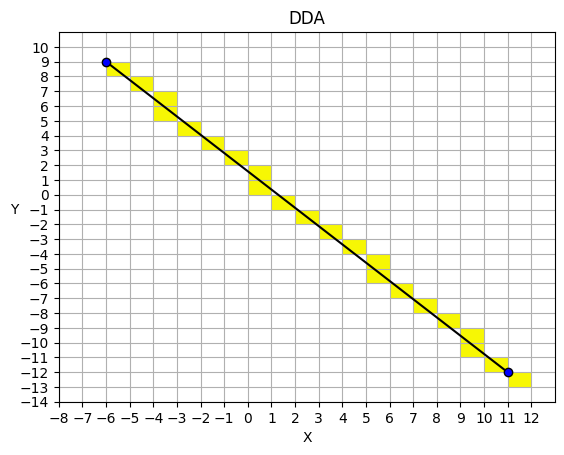

In [ ]:
import matplotlib.pyplot as plt

def draw_line_DDA(
    x1: int, y1: int, x2: int, y2: int
) -> tuple[list[tuple[int, int]], list[tuple[int | float, int | float]]]:
    """
    Obtém as coordenadas necessárias para desenhar uma reta entre dois pontos usando o
    algoritmo DDA.
    
    Parâmetros:
    x1 (int): Coordenada x do primeiro ponto.
    y1 (int): Coordenada y do primeiro ponto.
    x2 (int): Coordenada x do segundo ponto.
    y2 (int): Coordenada y do segundo ponto.
    
    Retorna:
    tuple: Uma tupla contendo dois elementos:
        - Uma lista de tuplas representando os pontos da reta
        - Uma lista de tuplas contendo os pontos âncora dos "pixels"
    """
    
    if abs(x2 - x1) > abs(y2 - y1):
        step = abs(x2 - x1)
        main_axis = 'x'
    else:
        step = abs(y2 - y1)
        main_axis = 'y'
    
    x_inc: float = (x2 - x1) / step
    y_inc: float = (y2 - y1) / step
    
    x:float = x1
    y:float = y1
    
    line_points: list[tuple[int, int]] = []
    real_points: list[tuple[int | float, int | float]] = []
    while x < x2:
        # Definir coordenadas âncoras do "pixel"
        if main_axis == "x":
            real_points.append((round(x), y))
        else:
            real_points.append((x, round(y)))
            
        # Definir coordenadas da reta
        line_points.append((round(x), round(y)))
        
        x += x_inc
        y += y_inc   
    line_points.append((x2, y2))
    real_points.append((x2, y2))
    
    return line_points, real_points


def plot_line(
        points: list[tuple[int, int]], 
        real_points: list[tuple[int | float, int | float]]
    ) -> None:
    """
    Plota a linha com pontos definidos em `real_points`, e pinta os "pixels" necessários
    com base nas coordenadas definidas em `points`.
    
    Parâmetros:
    points (list): Uma lista de tuplas representando os pontos âncora de "pixels".
    real_points (list): Uma lista de tuplas representando os pontos da reta.
    
    Retorna:
    None
    """
    
    # Pontos que formam a reta
    x = [point[0] for point in real_points]
    y = [point[1] for point in real_points]
    
    plt.plot(x, y, marker='o', mfc="b", color='#000000', markevery=[0,-1])
    
    m = (y[-1] - y[0]) / (x[-1] - x[0])
    # Colorir os "pixels"
    for point in points:
        plt.fill(
            "x", "y", "#f7f704",
            data={
                "x": [point[0], point[0], point[0]+1, point[0]+1],
                "y": (
                    [point[1], point[1]+1, point[1]+1, point[1]] if m >= 0 
                    else [point[1], point[1]-1, point[1]-1, point[1]]
                )
            }
        )

    # Legendas
    plt.title('DDA')
    plt.xlabel('X')
    plt.ylabel('Y', rotation='horizontal')
    plt.grid(True)
    
    # Ajustar ticks dos eixos x e y
    ax = plt.gca()
    ax.set_xlim((min(x) - 2, max(x) + 2))
    ax.set_ylim((min(y) - 2, max(y) + 2))
    ax.set_xticks([i for i in range(int(min(x)) - 2, int(max(x)) + 2)])
    ax.set_yticks([i for i in range(int(min(y)) - 2, int(max(y)) + 2)])

    plt.show()


if __name__ == "__main__":
    # Pontos inicial (x1, y1) e final (x2, y2)
    x1, y1 = -6, 9
    x2, y2 = 11, -12

    points, real_points = draw_line_DDA(x1, y1, x2, y2)
    plot_line(points, real_points)


# Bresenham

## Retas

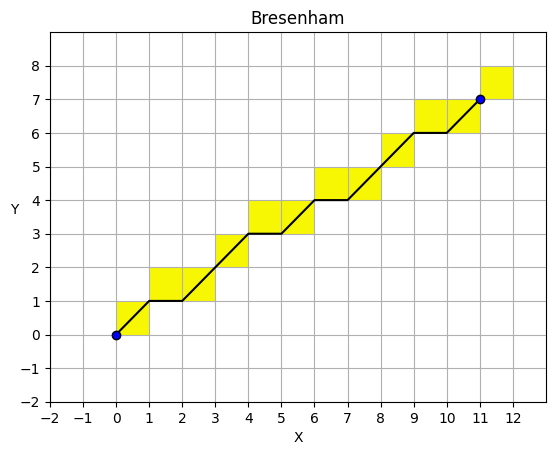

In [ ]:
import matplotlib.pyplot as plt

def draw_line_Bresenham(x1: int, y1: int, x2: int, y2: int) -> list[tuple[int, int]]:
    """
    Obtém as coordenadas necessárias para desenhar uma reta entre dois pontos usando o
    algoritmo Bresenham.
    
    Parâmetros:
    x1 (int): Coordenada x do primeiro ponto.
    y1 (int): Coordenada y do primeiro ponto.
    x2 (int): Coordenada x do segundo ponto.
    y2 (int): Coordenada y do segundo ponto.
    
    Retorna:
    list: Uma lista de tuplas contendo os pontos âncora dos "pixels"
    """
    
    points: list[tuple[int, int]] = []

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)

    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1

    err = dx - dy

    while x1 != x2 or y1 != y2:
        points.append((x1, y1))

        err2 = 2 * err

        if err2 > -dy:
            err -= dy
            x1 += sx

        if err2 < dx:
            err += dx
            y1 += sy

    points.append((x1, y1))

    return points


def plot_line(points: list[tuple[int, int]]) -> None:
    """
    Plota a linha com pontos e "pixels" definidos em `points`.
    
    Parâmetros:
    points (list): Uma lista de tuplas representando os pontos âncora de "pixels".
    
    Retorna:
    None
    """
    
    # Pontos que formam a reta
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    
    plt.plot(x, y, marker='o', mfc="b", color='#000000', markevery=[0,-1])
    
    m = (y[-1] - y[0]) / (x[-1] - x[0])
    # Colorir os "pixels"
    for point in points:
        plt.fill(
            "x", "y", "#f7f704",
            data={
                "x": [point[0], point[0], point[0]+1, point[0]+1],
                "y": (
                    [point[1], point[1]+1, point[1]+1, point[1]] if m >= 0
                    else [point[1], point[1]-1, point[1]-1, point[1]]
                )
            }
        )

    # Legendas
    plt.title('Bresenham')
    plt.xlabel('X')
    plt.ylabel('Y', rotation='horizontal')
    plt.grid(True)
    
    # Ajustar ticks dos eixos x e y
    ax = plt.gca()
    ax.set_xlim((min(x) - 2, max(x) + 2))
    ax.set_ylim((min(y) - 2, max(y) + 2))
    ax.set_xticks([i for i in range(min(x) - 2, max(x) + 2)])
    ax.set_yticks([i for i in range(min(y) - 2, max(y) + 2)])

    plt.show()


if __name__ == "__main__":
    # Pontos inicial (x1, y1) e final (x2, y2)
    x1, y1 = 0, 0
    x2, y2 = 11, 7

    points = draw_line_Bresenham(x1, y1, x2, y2)
    plot_line(points)

## Circunferências

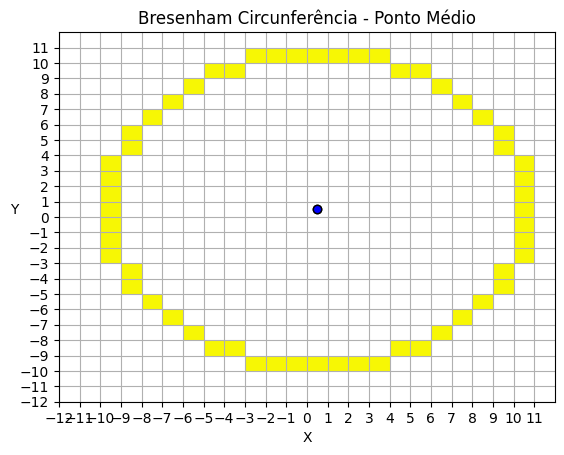

In [35]:
import matplotlib.pyplot as plt

def add_octants(points: list[tuple[int, int]], x: int, y: int) -> None:
    """
    Adiciona à `points` os pontos esquivalentes à (`x`, `y`) nos outros octantes
    da circunferência
    
    Parâmetros:
    points (list): Lista de pontos a ser incrementada
    x, y (int): Coordenadas base
    
    Retorna:
    None
    """
    
    points.append((y, x))   # 2 octant
    points.append((y, -x))  # 3 octant
    points.append((-x, y))  # 4 octant
    points.append((-x, -y)) # 5 octant
    points.append((-y, -x)) # 6 octant
    points.append((-y, x))  # 7 octant
    points.append((x, -y))  # 8 octant


def draw_ring_Bresenham(
    x_center: int, y_center: int, radius: int
) -> list[tuple[int, int]]:
    """
    Obtém as coordenadas necessárias para desenhar uma circunferência usando o
    algoritmo Bresenham - Ponto Médio.
    
    Parâmetros:
    x_center, y_center (int): Coordenadas do centro da circunferência
    radius (int): Raio da circunferência
    
    Retorna:
    list: Uma lista de tuplas contendo os pontos que formam a circunferência
    """
    
    points: list[tuple[int, int]] = []

    x, y = 0, radius
    p = 1 - radius
    
    points.append((x, y))
    add_octants(points, x, y)
    
    x += 1
    while x < y:
        if p < 0:
            p = p + 2*x + 1
        else:
            y -= 1
            p = p + 2*x + 1 - 2*y
        
        points.append((x, y))
        add_octants(points, x, y)
        
        x += 1
    
    real_points: list[tuple[int, int]] = [
            (point[0]+x_center, point[1]+y_center) for point in points
        ]

    return real_points


def plot_ring(points: list[tuple[int, int]], x_center: int, y_center: int) -> None:
    """
    Plota a circunferência definida pelos pontos em `points`.
    
    Parâmetros:
    points (list): Uma lista de tuplas representando os pontos de uma circunferência.
    x_center, y_center (int): Coordenadas do ponto central da circunferência.
    
    Retorna:
    None
    """
    
    # Pontos que formam a reta
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    
    plt.plot(
        [x_center + 0.5], [y_center + 0.5], 
        marker='o', mfc="b", color='#000000', markevery=[0,-1]
    )
    
    # m = (y[-1] - y[0]) / (x[-1] - x[0])
    # Colorir os "pixels"
    for point in points:
        plt.fill(
            "x", "y", "#f7f704",
            data={
                "x": [point[0], point[0], point[0]+1, point[0]+1],
                "y": ([point[1], point[1]+1, point[1]+1, point[1]])
            }
        )

    # Legendas
    plt.title('Bresenham Circunferência - Ponto Médio')
    plt.xlabel('X')
    plt.ylabel('Y', rotation='horizontal')
    plt.grid(True)
    
    # Ajustar ticks dos eixos x e y
    ax = plt.gca()
    ax.set_xlim((min(x) - 2, max(x) + 2))
    ax.set_ylim((min(y) - 2, max(y) + 2))
    ax.set_xticks([i for i in range(min(x) - 2, max(x) + 2)])
    ax.set_yticks([i for i in range(min(y) - 2, max(y) + 2)])

    plt.show()


if __name__ == "__main__":
    # Ponto central (x_center, y_center) e raio (r)
    x_center, y_center = 0, 0
    radius = 10

    points = draw_ring_Bresenham(x_center, y_center, radius)
    
    plot_ring(points, x_center, y_center)